# Project MNIST

## Importing the dataset

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784')

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
x, y = mnist['data'], mnist['target']

In [6]:
x.head()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [340]:
x.shape

(70000, 784)

In [ ]:
pip install matplotlib

In [342]:
%matplotlib inline

In [343]:
import matplotlib

In [344]:
import matplotlib.pyplot as plt

In [345]:
type(x)

pandas.core.frame.DataFrame

In [347]:
x.dtypes

pixel1      float64
pixel2      float64
pixel3      float64
pixel4      float64
pixel5      float64
             ...   
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
pixel784    float64
Length: 784, dtype: object

In [348]:
y.shape

(70000,)

In [349]:
import numpy as np

In [350]:
x=  np.array(x)

In [351]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [354]:
y = np.array(y)
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

### This a 1D dimentional dataset for the pcitures but lets tranform this to a 2D numpy array of 28x28 so we can plot it

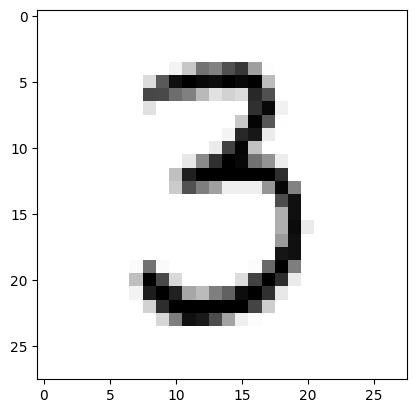

In [355]:
example = x[50]
example_plot = example.reshape(28,28)
plt.imshow(example_plot,cmap = matplotlib.cm.binary,interpolation = 'nearest')


In [356]:
y[50] # lets see if its asigned to the right

'3'

In [357]:
x_train, x_test = x[:60000],x[60000:]

In [358]:
y_train, y_test = y[:60000],y[60000:]


In [359]:
shuffle = np.random.permutation(60000) #mixing up the examples

In [360]:
x_train, y_train = x_train[shuffle],y_train[shuffle]
x_train.shape


(60000, 784)

### Logistic regression Model

In [361]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [362]:
from sklearn.linear_model import LogisticRegression

In [363]:
LG = LogisticRegression(max_iter=7000, C=0.1, solver='lbfgs', penalty='l2')

In [364]:
LG.fit(x_train_scaled,y_train)

LogisticRegression(C=0.1, max_iter=7000)

In [365]:
from sklearn import metrics

In [366]:
predictions = LG.predict(x_test_scaled)

In [367]:
print("Accuracy of the model is ",metrics.accuracy_score(predictions,y_test)*100)

Accuracy of the model is  92.58


### Neural Network

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [370]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [409]:
x, y = mnist['data'], mnist['target']
y_train, y_test = y[:60000],y[60000:]
x_train, x_test = x[:60000],x[60000:]


In [410]:
y_train = pd.DataFrame(int(label) for label in y_train)
y_test = pd.DataFrame(int(label) for label in y_test)

### Standardization

In [411]:
x_train = x_train/255
x_test = x_test/255

### Neural Network Model

In [412]:
model = keras.Sequential([
    keras.layers.Dense(10,activation='sigmoid',input_shape=(784,))
])
model.compile(
    optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4667 - accuracy: 0.8761
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3034 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2830 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9259


In [413]:
print("Accuracy of the model is :",model.evaluate(x_test,y_test)[1]*100)

313/313 [==============================] - 1s 1ms/step - loss: 0.2675 - accuracy: 0.9254
Accuracy of the model is : 92.54000186920166


### Prediction Testing without Hidden Layers

In [414]:
predicted = model.predict(x_test)


313/313 [==============================] - 1s 1ms/step


In [415]:
example_test_x = np.array(x_test)
example_test_y = np.array(y_test)

In [416]:
def check(i):
    example = example_test_x[i]
    example_viz = example.reshape(28,28)
    plt.matshow(example_viz)
    if(np.argmax(predicted[i])==example_test_y[i]):
        print("Correct Prediction :", example_test_y[i])
    else:
        print("Wrong Prediction\n Expected : ",example_test_y[i],"\nPredicted :",np.argmax(predicted[i]))

### Correct Prediction

Correct Prediction : [7]


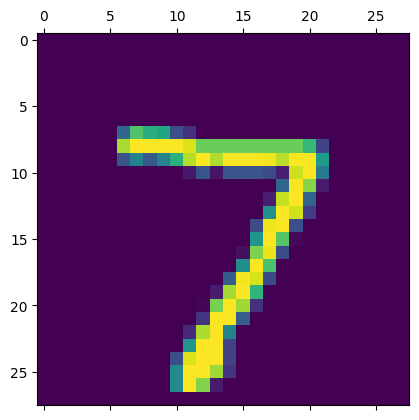

In [417]:
check(0)

Correct Prediction : [5]


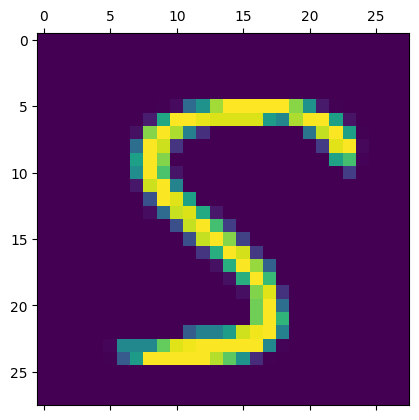

In [418]:
check(333)

### Failed Cases

Wrong Prediction
 Expected :  [5] 
Predicted : 6


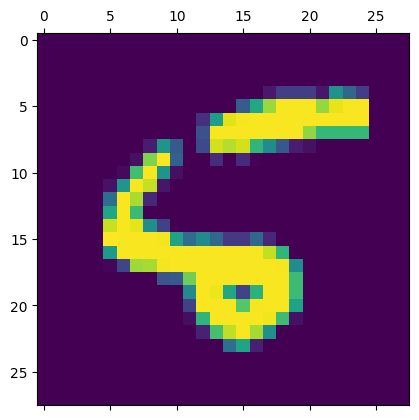

In [419]:
check(8)

In [422]:
predicted = [np.argmax(i) for i in predicted]

In [ ]:
pip install seaborn

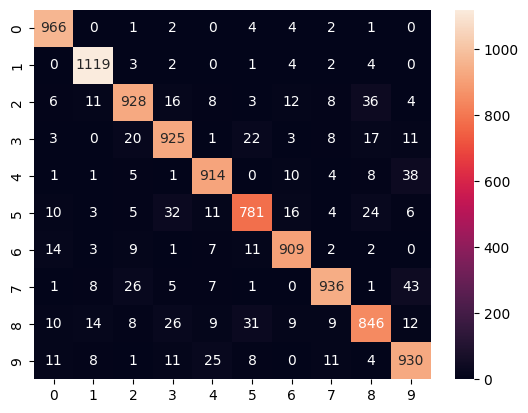

In [424]:
import seaborn as sb
sb.heatmap(tf.math.confusion_matrix(labels = y_test,predictions=predicted),annot=True,fmt = 'd')
plt.xlabel = "Predicted"
plt.ylabel = "Actual Values"
plt.show()

### Deep Neural Network

In [425]:
model = keras.Sequential([
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    metrics = ["accuracy"],
    loss = "sparse_categorical_crossentropy"
    
)
model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2740 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1230 - accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0859 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0507 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0406 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0339 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0270 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0226 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.017

In [436]:
new_predicted = model.predict(x_test)
new_predicted.shape



313/313 [==============================] - 1s 2ms/step


(10000, 10)

### Prediction Testing with hidden layers

In [431]:
print("The accuracy of the model is",model.evaluate(x_test,y_test)[1]*100)

313/313 [==============================] - 1s 1ms/step - loss: 0.0932 - accuracy: 0.9747
The accuracy of the model is 97.46999740600586


In [432]:
example_test_x = np.array(x_test)
example_test_y = np.array(y_test)
def new_check(i):
    example = example_test_x[i]
    example_viz = example.reshape(28,28)
    plt.matshow(example_viz)
    if(np.argmax(new_predicted[i])==example_test_y[i]):
        print("Correct Prediction :", example_test_y[i])
    else:
        print("Wrong Prediction\n Expected : ",example_test_y[i],"\nPredicted :",np.argmax(new_predicted[i]))

Correct Prediction : [1]


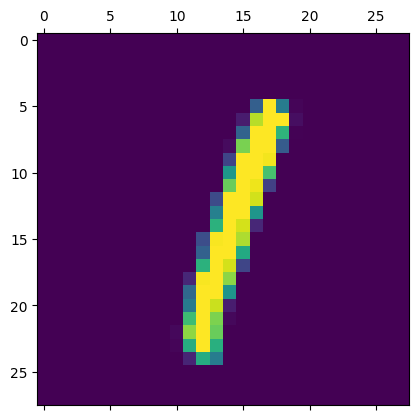

In [433]:
new_check(5)

Correct Prediction : [9]


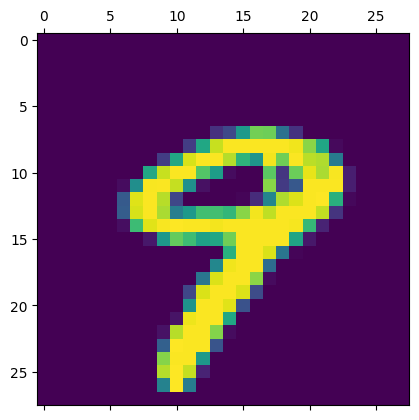

In [437]:
new_check(9)

Correct Prediction : [2]


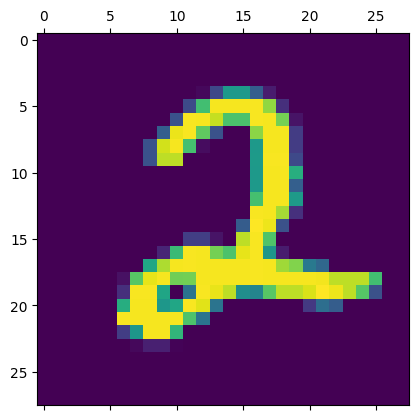

In [438]:
new_check(3223)

### Reprediction of the previous failed case

Correct Prediction : [5]


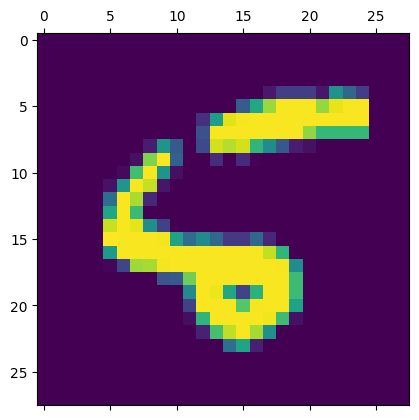

In [439]:
new_check(8)

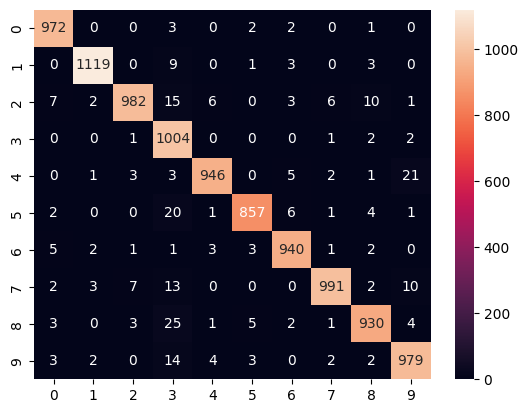

In [407]:
conmap = tf.math.confusion_matrix(labels = y_test,predictions=predicted)
sb.heatmap(conmap,annot = True,fmt='d')
plt.xlabel = "Actual Values"
plt.ylabel  = "Predictions"

### We finally see after adding a 100 hidden layers the accuracy increased significantly and the test which had failed without the hidden layers has pased now.
